In [14]:
import numpy as np
import pandas as pd

In [15]:
data = pd.read_csv("marketing_data.csv")

In [16]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
data.info()

In [18]:
def age_grp(year):
    gap = 2020 - year
    if gap >=0 and gap < 12 :
        return "Kids"
    if gap >=12 and gap < 20 :
        return "Teenagers"
    if gap >=20 and gap < 30 :
        return "Young Adults"
    if gap >=30 and gap < 40:
        return "Middle Aged Adults"
    if gap >=41 and gap < 55 :
        return "Older Adults"
    else :
        return "Senior Citizens"

In [19]:
data['Age'] = 2020 - data['Year_Birth']
data['age_group'] = data['Year_Birth'].apply(age_grp)

In [20]:
data.age_group.value_counts()

Older Adults          956
Senior Citizens       899
Middle Aged Adults    342
Young Adults           43
Name: age_group, dtype: int64

In [21]:
data.dtypes.value_counts()

int64     24
object     6
dtype: int64

In [ ]:
data.isna().sum()

In [22]:
data.rename(columns={' Income ' : 'Income'}, inplace=True)

In [23]:
data['Income'] = data['Income'].str.replace('$','')

C:\Users\Asus\AppData\Local\Temp/ipykernel_19120/1386941329.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace('$','')


In [25]:
data['Income'] = data['Income'].str.replace(',','')
data['Income'] = pd.to_numeric(data['Income'])

<AxesSubplot:>

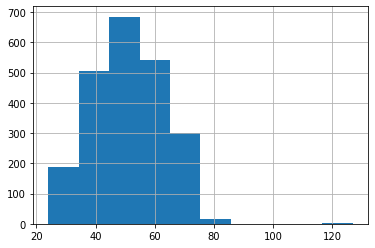

In [29]:
data['Age'].hist()

In [42]:
data.iloc[:, 9:].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,age_group,Total_Purchase,Total_Spendings
0,189,104,379,111,189,218,1,4,4,6,...,0,0,0,1,0,SP,50,Older Adults,15,1190
1,464,5,64,7,0,37,1,7,3,7,...,0,0,1,1,0,CA,59,Senior Citizens,18,577
2,134,11,59,15,2,30,1,3,2,5,...,0,0,0,0,0,US,62,Senior Citizens,11,251
3,10,0,1,0,0,0,1,1,0,2,...,0,0,0,0,0,AUS,53,Older Adults,4,11
4,6,16,24,11,0,34,2,3,1,2,...,0,0,0,1,0,SP,31,Middle Aged Adults,8,91


In [34]:
data['NumDealsPurchases'].value_counts()

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
11      5
10      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [44]:
data['Total_Purchase'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [45]:
data['Total_Spendings'] = data['MntWines'] + data['MntSweetProducts'] + data['MntMeatProducts'] + data['MntGoldProds'] + data['MntFruits'] + data['MntFishProducts']

In [62]:
data['Income'].fillna(value = data['Income'].median(), inplace=True)

In [ ]:
data.drop('ID', axis=1, inplace=True)

In [64]:
data['Marital_Status'].value_counts(), data['Education'].value_counts()

(Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 YOLO          2
 Absurd        2
 Name: Marital_Status, dtype: int64,
 Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: Education, dtype: int64)

In [65]:
income_grp = data.groupby(['Marital_Status', 'Education'], as_index=False)['Income'].mean()

In [66]:
income_grp.sort_values('Income', ascending=False)

,Marital_Status,Education,Income
0,Absurd,Graduation,79244.000000
1,Absurd,Master,65487.000000
3,Alone,Master,61331.000000
29,Widow,PhD,60288.083333
14,Married,PhD,58067.651042
28,Widow,Master,57816.541667
24,Together,PhD,56001.594017
22,Together,Graduation,55743.176573
27,Widow,Graduation,54976.657143
7,Divorced,Graduation,54526.042017


In [67]:
data.to_csv('Updated_Marketing_Data.csv')